# Exercise 7

# Lady Oñate
# Johan Suarez

Data Preparation

We will train our network on the **CIFAR10** [dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which contains `50,000` 32x32 color training images, labeled over 10 categories, and 10,000 test images. 

As this dataset is also included in Keras datasets, we just ask the `keras.datasets` module for the dataset.

Training and test images are normalized to lie in the $\left[0,1\right]$ interval.

In [3]:
from keras.datasets import cifar10
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Normal option with full database
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()  # File is 160MB

In [4]:
# Only the first training batch and testing  # File is 58MB
import tarfile
from six.moves import cPickle

# Use local copy of the cifar-10 database
data_tar = tarfile.open('../datasets/cifar-10-python_trainingbatch1_test.tar.gz')

def extract_xy(member, data_tar):
    d = cPickle.load(data_tar.extractfile(member), encoding='bytes')
    d_decoded = {}
    for k, v in d.items():
        d_decoded[k.decode('utf8')] = v
    d = d_decoded
    X = d['data']
    X = X.reshape(X.shape[0], 3, 32, 32)
    y = d['labels']
    return X.transpose(0, 2, 3, 1), np.reshape(y, (len(y), 1))

X_train, y_train = extract_xy('cifar-10-batches-py/data_batch_1', data_tar)
X_test, y_test = extract_xy('cifar-10-batches-py/test_batch', data_tar)

In [5]:
X_train.shape, X_test.shape

((10000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
nb_classes = y_train.max() + 1
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [6]:
labels = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [7]:
X_train[0].shape

(32, 32, 3)

In [8]:
y_train[0]

array([6])

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

NameError: name 'labels' is not defined

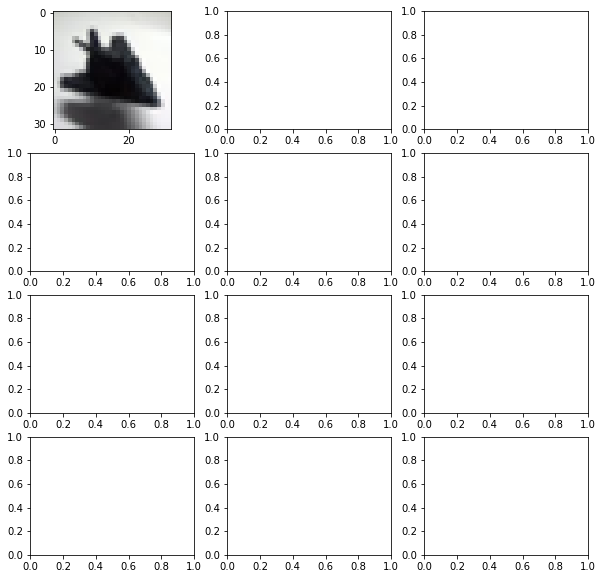

In [10]:
# Select one image per y
images = [np.nonzero(Y_train[:,i] == 1)[0][0] for i in range(nb_classes)]

# Plot all images
fig, ax = plt.subplots(4,3, figsize=(10,10))
ax = ax.reshape(12)
for i in range(nb_classes):
    ax[i].imshow(X_train[images[i]])
    ax[i].set_title(labels[y_train[images[i]][0]])
    ax[i].axis('off')

ax[-1].axis('off')
ax[-2].axis('off')
plt.show()

# Exercise 08.1

Train a Softmax regression using keras
Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 31% with 50 epochs)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from livelossplot import PlotLossesKeras

In [16]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(units=10))
model.add(Activation('softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=50, verbose=2)

Epoch 1/50
 - 1s - loss: 1.9476 - acc: 0.3536
Epoch 2/50
 - 1s - loss: 1.9346 - acc: 0.3532
Epoch 3/50
 - 1s - loss: 1.9211 - acc: 0.3568
Epoch 4/50
 - 1s - loss: 1.9173 - acc: 0.3558
Epoch 5/50
 - 1s - loss: 1.9098 - acc: 0.3599
Epoch 6/50
 - 1s - loss: 1.9049 - acc: 0.3624
Epoch 7/50
 - 1s - loss: 1.8948 - acc: 0.3696
Epoch 8/50
 - 1s - loss: 1.8965 - acc: 0.3672
Epoch 9/50
 - 1s - loss: 1.8769 - acc: 0.3739
Epoch 10/50
 - 1s - loss: 1.8720 - acc: 0.3759
Epoch 11/50
 - 1s - loss: 1.8638 - acc: 0.3740
Epoch 12/50
 - 1s - loss: 1.8604 - acc: 0.3763
Epoch 13/50
 - 1s - loss: 1.8666 - acc: 0.3747
Epoch 14/50
 - 1s - loss: 1.8670 - acc: 0.3775
Epoch 15/50
 - 1s - loss: 1.8462 - acc: 0.3830
Epoch 16/50
 - 1s - loss: 1.8510 - acc: 0.3816
Epoch 17/50
 - 1s - loss: 1.8407 - acc: 0.3813
Epoch 18/50
 - 1s - loss: 1.8405 - acc: 0.3843
Epoch 19/50
 - 1s - loss: 1.8286 - acc: 0.3863
Epoch 20/50
 - 1s - loss: 1.8289 - acc: 0.3880
Epoch 21/50
 - 1s - loss: 1.8282 - acc: 0.3858
Epoch 22/50
 - 1s - lo

In [21]:
y_pred=(model.predict(X_test))

In [22]:
y_pred

array([[1.0824090e-01, 8.8168584e-02, 8.7021805e-02, ..., 1.5402088e-03,
        1.9700642e-01, 7.3028161e-05],
       [2.4165653e-01, 3.0213648e-02, 4.1089877e-03, ..., 3.4195010e-04,
        5.6341362e-01, 1.5584436e-01],
       [5.7003206e-01, 3.7367893e-03, 4.0592183e-03, ..., 8.4053504e-04,
        4.0480581e-01, 4.0433933e-03],
       ...,
       [4.5297723e-02, 6.0484288e-03, 1.2062885e-01, ..., 1.2742111e-01,
        4.5279756e-02, 8.9079523e-03],
       [3.5165872e-02, 1.5314150e-02, 9.7601131e-02, ..., 1.0246978e-02,
        1.0926842e-02, 3.4115263e-03],
       [1.4150281e-01, 8.0889845e-03, 4.9162429e-02, ..., 1.7538442e-01,
        6.1674792e-02, 8.7222876e-03]], dtype=float32)

In [25]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 36us/step
Test score: 2.186734698867798
Test accuracy: 0.3192


# Exercise 08.2

Train a Deep Neural Network with the following architecture:

- Input = Image (32, 32, 3)
- Conv2d(32, (3,3), padding='same')
- Relu Activation
- MaxPooling2D (2,2)
- Dropout(0.5)
- Flattern
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [26]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(32,32,3),padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                81930     
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total para

In [28]:
model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [31]:
model2.fit(X_train, Y_train, epochs=50, verbose=2)

Epoch 1/50
 - 13s - loss: 1.4357 - acc: 0.4966
Epoch 2/50
 - 13s - loss: 1.3473 - acc: 0.5288
Epoch 3/50
 - 14s - loss: 1.2931 - acc: 0.5524
Epoch 4/50
 - 13s - loss: 1.2477 - acc: 0.5624
Epoch 5/50
 - 13s - loss: 1.2112 - acc: 0.5770
Epoch 6/50
 - 14s - loss: 1.1808 - acc: 0.5874
Epoch 7/50
 - 13s - loss: 1.1579 - acc: 0.6008
Epoch 8/50
 - 13s - loss: 1.1369 - acc: 0.6070
Epoch 9/50
 - 13s - loss: 1.1032 - acc: 0.6169
Epoch 10/50
 - 13s - loss: 1.0781 - acc: 0.6254
Epoch 11/50
 - 13s - loss: 1.0654 - acc: 0.6312
Epoch 12/50
 - 13s - loss: 1.0362 - acc: 0.6414
Epoch 13/50
 - 13s - loss: 1.0222 - acc: 0.6459
Epoch 14/50
 - 13s - loss: 1.0012 - acc: 0.6524
Epoch 15/50
 - 13s - loss: 0.9858 - acc: 0.6636
Epoch 16/50
 - 13s - loss: 0.9834 - acc: 0.6618
Epoch 17/50
 - 13s - loss: 0.9718 - acc: 0.6627
Epoch 18/50
 - 13s - loss: 0.9496 - acc: 0.6737
Epoch 19/50
 - 13s - loss: 0.9367 - acc: 0.6800
Epoch 20/50
 - 13s - loss: 0.9318 - acc: 0.6810
Epoch 21/50
 - 13s - loss: 0.9139 - acc: 0.6807
E

In [34]:
score2 = model2.evaluate(X_test, Y_test)
print('Test score:', score2[0])
print('Test accuracy:', score2[1])

10000/10000 [==============================] - 5s 491us/step
Test score: 1.4925569602966309
Test accuracy: 0.5671


# Exercise 08.3

Use the last layer of VGG16 as the input to a neural network with softmax output

- Input = Image (32, 32, 3)
- VGG16 
- Flattern
- Dense(512, Softmax)
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 57% with 50 epochs)

In [1]:
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False)


C:\Users\Andres Piraban Acero\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


NameError: name 'modelvgg16' is not defined

In [2]:
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [46]:
output_vgg16=model_vgg16.predict(X_train)

In [50]:
output_vgg16.shape

(10000, 1, 1, 512)

In [51]:
model3 = Sequential()
model3.add(Flatten(input_shape=(1,1,512)))
model3.add(Dense(units=512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units=10))
model3.add(Activation('softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 267,786
Trainable params: 267,786
Non-trainable params: 0
_________________________________________________________________


In [52]:
model3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [56]:
model3.fit(output_vgg16, Y_train, epochs=10, verbose=2)

Epoch 1/10
 - 3s - loss: 1.4087 - acc: 0.5066
Epoch 2/10
 - 2s - loss: 1.3155 - acc: 0.5422
Epoch 3/10
 - 3s - loss: 1.2671 - acc: 0.5587
Epoch 4/10
 - 3s - loss: 1.2172 - acc: 0.5734
Epoch 5/10
 - 2s - loss: 1.1835 - acc: 0.5919
Epoch 6/10
 - 2s - loss: 1.1570 - acc: 0.5941
Epoch 7/10
 - 3s - loss: 1.1278 - acc: 0.6078
Epoch 8/10
 - 3s - loss: 1.0975 - acc: 0.6146
Epoch 9/10
 - 3s - loss: 1.0810 - acc: 0.6243
Epoch 10/10
 - 3s - loss: 1.0523 - acc: 0.6365


In [54]:
output_vgg16_test=model_vgg16.predict(X_test)

In [57]:
score3 = model3.evaluate(output_vgg16_test, Y_test)
print('Test score:', score3[0])
print('Test accuracy:', score3[1])

10000/10000 [==============================] - 1s 71us/step
Test score: 1.2835079751968383
Test accuracy: 0.5737


# Exercise *08.4 (Bonus)

Test a different pre-train algorithm (https://keras.io/applications/#usage-examples-for-image-classification-models) 